In [129]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianDropout
from tensorflow import keras
import tensorflow.keras.optimizers as optimizers
import numpy as np
import matplotlib
from matplotlib import pyplot
from IPython.display import clear_output

In [5]:
#downloads MNIST dataset
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


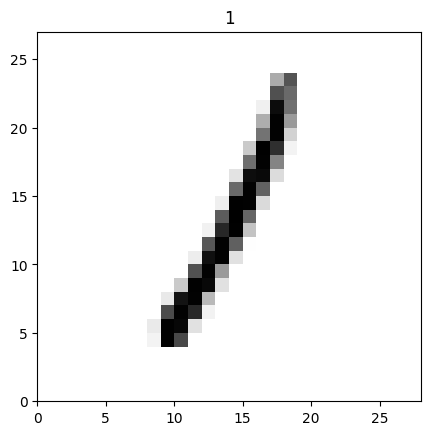

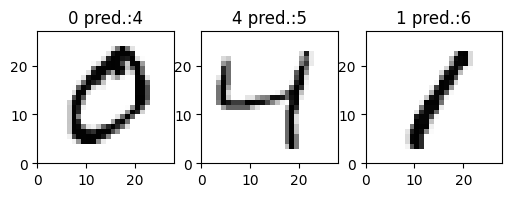

In [171]:
#function for printing random image from MNIST dataset
def print_rand_img(x_tr,y_tr):
    fig,plot=pyplot.subplots()
    n=np.random.randint(0,len(x_tr))
    colors=pyplot.colormaps['Greys']
    tmp=[[x_tr[n][i,j] for j in range(28)] for i in range(27,0,-1)]
    plot.pcolormesh(tmp,cmap=colors)
    plot.set_title(y_tr[n])
    plot.set_aspect(1)
    pyplot.show()

#function for printing MNIST images corresponding to numbers in pos_list, with lables from label_list
def print_imgs(x_tr,y_tr,pos_list,label_list):
    fig=pyplot.figure(figsize=(2*len(pos_list),2))
    plot=fig.add_gridspec(1,len(pos_list))
    plt=plot.subplots()
    colors=pyplot.colormaps['Greys']
    tmps=[[[x_tr[n][i,j] for j in range(28)] for i in range(27,0,-1)] for n in pos_list]
    for n in range(len(pos_list)):
        plt[n].pcolormesh(tmps[n],cmap=colors)
        plt[n].set_title(f"{y_tr[pos_list[n]]:} pred.:"+f"{label_list[n]:}")
        plt[n].set_aspect(1)
    pyplot.show()

print_rand_img(x_train,y_train)
print_imgs(x_train,y_train,[1,2,3],[4,5,6])

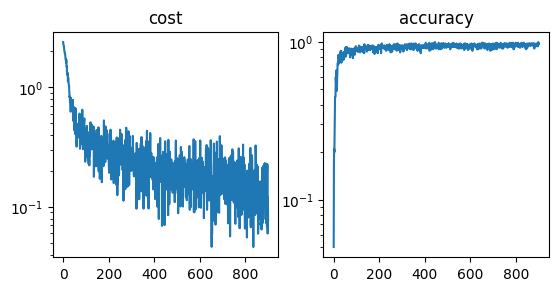

In [148]:
#here NN is trained

def print_cost(cost,accuracy):
    clear_output(wait=True)
    fig=pyplot.figure()
    plt=fig.add_gridspec(1,2)
    plot=plt.subplots()
    plot[0].set_yscale('log')
    plot[1].set_yscale('log')
    plot[0].plot(cost,label="cost")
    plot[1].plot(accuracy,label="accuracy")
    plot[0].set_title("cost")
    plot[1].set_title("accuracy")
    plot[0].set_box_aspect(1)
    plot[1].set_box_aspect(1)
    pyplot.show()
    
#setting network
network=Sequential()
network.add(Dense(100,input_shape=(28**2,),activation='relu'))
#network.add(GaussianDropout(0.1))
network.add(Dense(50,activation='relu'))
network.add(Dense(10,activation='softmax'))
network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

def teach_network(model,Nsteps,Nbatch,Xtr,Ytr):
    cost=[None]*Nsteps
    accuracy=[None]*Nsteps
    for it in range(Nsteps):
        nums=np.random.choice([i for i in range(len(Xtr))],Nbatch,False)
        Xbatch=np.array([Xtr[i].flatten()/255.0 for i in nums])
        Ybatch=np.array([[0 if j!=Ytr[i] else 1.0 for j in range(10)] for i in nums])
        #print(np.shape(Xbatch))
        cost[it],accuracy[it]=model.train_on_batch(Xbatch,Ybatch)
        print(f"{it/Nsteps:.0%}"," cost=",cost[it],end="            \r")
        if it%int(Nsteps/10.0)==0:
            print_cost(cost,accuracy)

teach_network(network,1000,100,x_train,y_train)


accuracy= 95.0


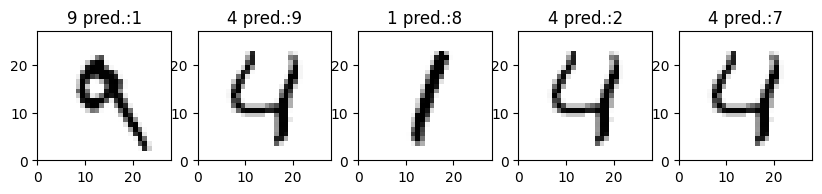

In [174]:
#testing accuracy of the model, as an output the list of wrongly recognized images is shown
def testing(model,X,Y):
    N=100
    nums=np.random.choice([i for i in range(len(X))],N,False)
    input=np.array([X[i].flatten() for i in nums])
    test_out=np.array([Y[i] for i in nums])
    network_out=model.predict_on_batch(input)
    output=np.array([np.argmax(network_out[i]) for i in range(N)])
    agreement=np.array([1.0 if test_out[i]==output[i] else 0 for i in range(N)])
    print("accuracy=",agreement.sum()*100.0/N)
    errors=[]
    for i in range(N):
        if output[i]!=test_out[i]:
            errors.append(i)
    err_pos=[Y[nums[el]] for el in errors]
    err_labels=[output[el] for el in errors]
    if len(err_pos)!=0:
        print_imgs(X,Y,err_pos,err_labels)

testing(network,x_test,y_test)